<a href="https://colab.research.google.com/github/sajiniho07/PossumGenderPredictorModel/blob/main/possum_gender_predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# step 1: read data

In [21]:
df = pd.read_csv("/content/possum.csv")

In [22]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [23]:
df = df.drop(labels=["case", "site", "Pop"], axis=1)

In [7]:
# step 2: encode charachters to number

In [27]:
from sklearn.preprocessing import LabelEncoder
arr = df.values
encoded = arr.copy()
encoder = LabelEncoder()
encoded[:, 0] = encoder.fit_transform(arr[:, 0])
cols = ['sex', 'age',	'hdlngth',	'skullw',	'totlngth',	'taill',	'footlgth',	'earconch',	'eye',	'chest',	'belly']
df_encoded = pd.DataFrame(encoded.astype(float), columns=cols)
df_encoded.shape

(104, 11)

In [ ]:
# step 3: fill nans with mean

In [29]:
df_nans_filled = df_encoded.fillna(df_encoded.mean())

In [4]:
# step 4: equalize datas based on output data

In [30]:
equal0 = df_nans_filled["sex"] == 0.0
df_equal0 = df_nans_filled[equal0]
print(df_equal0.shape)
equal1 = df_nans_filled["sex"] == 1.0
df_equal1 = df_nans_filled[equal1]
print(df_equal1.shape)

(43, 11)
(61, 11)


In [32]:
df_1_equal1 = df_equal1.sample(df_equal0.shape[0])
df_1_equal1.shape

(43, 11)

In [33]:
df_balanced = pd.concat([df_equal0, df_1_equal1])
df_balanced.shape

(86, 11)

In [ ]:
# step 5: seprate features

In [34]:
df_y = df_balanced[["sex"]]
df_x = df_balanced.drop(labels=["sex"], axis=1)
print(df_x.shape, df_y.shape)

(86, 10) (86, 1)


In [ ]:
# step 6: normalize X datas

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_nrm =  scaler.fit_transform(df_x)

In [ ]:
# step 7: split data to train & test

In [36]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

In [ ]:
# step 8: initialize model callback

In [37]:
from keras.callbacks import EarlyStopping

callBack  = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
# step 9: define Dense model

In [57]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                704       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
# step 10: fit model

In [58]:
results = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/40
3/3 [==============================] - 1s 65ms/step - loss: 0.7081 - accuracy: 0.4412 - val_loss: 0.7169 - val_accuracy: 0.4444
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 0.6909 - accuracy: 0.4706 - val_loss: 0.7044 - val_accuracy: 0.3889
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 0.6796 - accuracy: 0.5294 - val_loss: 0.6943 - val_accuracy: 0.3889
Epoch 4/40
3/3 [==============================] - 0s 23ms/step - loss: 0.6692 - accuracy: 0.5882 - val_loss: 0.6875 - val_accuracy: 0.4444
Epoch 5/40
3/3 [==============================] - 0s 17ms/step - loss: 0.6608 - accuracy: 0.6176 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 6/40
3/3 [==============================] - 0s 13ms/step - loss: 0.6536 - accuracy: 0.6765 - val_loss: 0.6807 - val_accuracy: 0.4444
Epoch 7/40
3/3 [==============================] - 0s 15ms/step - loss: 0.6460 - accuracy: 0.7353 - val_loss: 0.6786 - val_accuracy: 0.4444
Epoch 8/40
3/3 [===========

In [ ]:
# step 11: prediction

In [59]:
yhat_test = model.predict(x_test).round()

1/1 [==============================] - 0s 43ms/step


In [ ]:
# step 12: metrics

In [60]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

yhat_test_reshaped = np.reshape(yhat_test, y_test.shape)
print(cr(y_test, yhat_test_reshaped))
print(cm(y_test, yhat_test_reshaped))

              precision    recall  f1-score   support

         0.0       0.64      0.82      0.72        11
         1.0       0.50      0.29      0.36         7

    accuracy                           0.61        18
   macro avg       0.57      0.55      0.54        18
weighted avg       0.59      0.61      0.58        18

[[9 2]
 [5 2]]


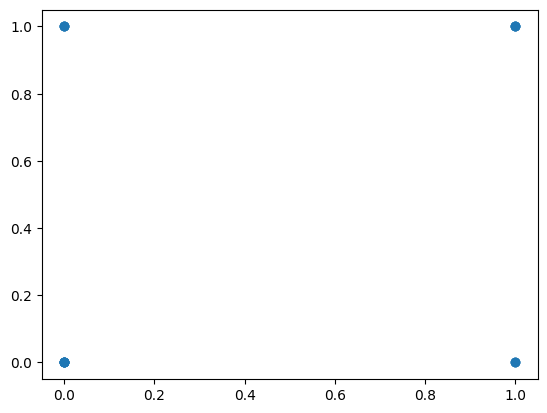

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, yhat_test_reshaped)

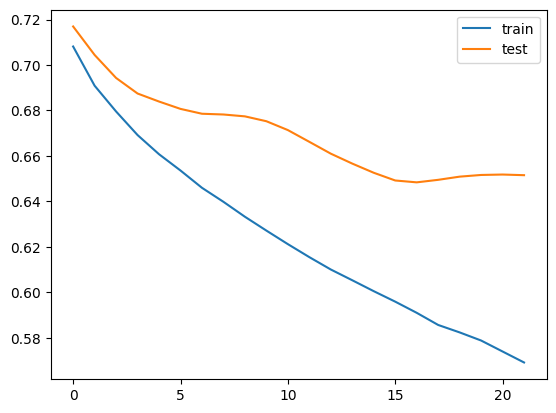

In [61]:
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='test')
plt.legend()

In [62]:
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

results_2 = model_2.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100
3/3 [==============================] - 1s 68ms/step - loss: 0.7216 - accuracy: 0.5294 - val_loss: 0.7238 - val_accuracy: 0.3889
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6870 - accuracy: 0.5441 - val_loss: 0.7073 - val_accuracy: 0.4444
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6681 - accuracy: 0.5441 - val_loss: 0.7006 - val_accuracy: 0.5556
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6570 - accuracy: 0.6324 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6468 - accuracy: 0.7059 - val_loss: 0.6968 - val_accuracy: 0.4444
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6391 - accuracy: 0.7353 - val_loss: 0.6985 - val_accuracy: 0.4444
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6323 - accuracy: 0.7500 - val_loss: 0.6995 - val_accuracy: 0.5556
Epoch 8/100
3/3 [===

In [63]:
yhat_test_2 = model_2.predict(x_test).round()

1/1 [==============================] - 0s 62ms/step


In [64]:
yhat_test_reshaped_2 = np.reshape(yhat_test_2, y_test.shape)
print(cr(y_test, yhat_test_reshaped_2))
print(cm(y_test, yhat_test_reshaped_2))

              precision    recall  f1-score   support

         0.0       0.86      0.55      0.67        11
         1.0       0.55      0.86      0.67         7

    accuracy                           0.67        18
   macro avg       0.70      0.70      0.67        18
weighted avg       0.74      0.67      0.67        18

[[6 5]
 [1 6]]


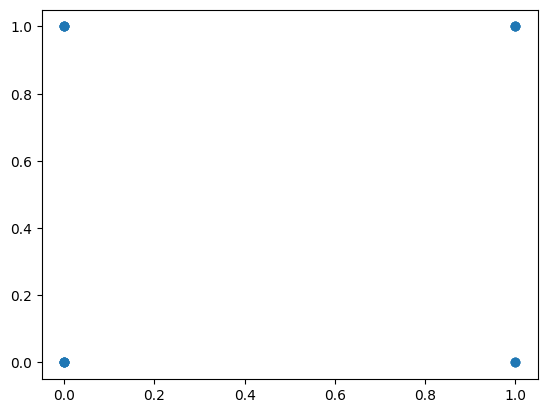

In [48]:
plt.scatter(y_test, yhat_test_reshaped_2)

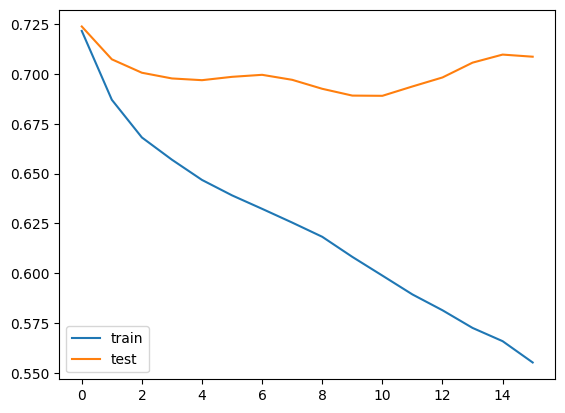

In [65]:
plt.plot(results_2.history['loss'], label='train')
plt.plot(results_2.history['val_loss'], label='test')
plt.legend()

In [66]:
from keras.optimizers import RMSprop
from keras.layers import LeakyReLU

model_3 = Sequential()
model_3.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_3.add(Dense(64))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dense(32))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics='accuracy')

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 1s 36ms/step - loss: 0.7003 - accuracy: 0.4853 - val_loss: 0.6623 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6536 - accuracy: 0.6765 - val_loss: 0.6666 - val_accuracy: 0.5556
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6234 - accuracy: 0.7500 - val_loss: 0.6621 - val_accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6072 - accuracy: 0.7206 - val_loss: 0.6622 - val_accuracy: 0.7222
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5816 - accuracy: 0.8088 - val_loss: 0.6447 - val_accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5651 - accuracy: 0.7794 - val_loss: 0.6349 - val_accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5395 - accuracy: 0.8088 - val_loss: 0.6272 - val_accuracy: 0.6667
Epoch 8/100
5/5 [=====================

In [67]:
yhat_test_3 = model_3.predict(x_test).round()

yhat_test_reshaped_3 = np.reshape(yhat_test_3, y_test.shape)
print(cr(y_test, yhat_test_reshaped_3))
print(cm(y_test, yhat_test_reshaped_3))

1/1 [==============================] - 0s 52ms/step
              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67        11
         1.0       0.50      0.57      0.53         7

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.62      0.61      0.61        18

[[7 4]
 [3 4]]


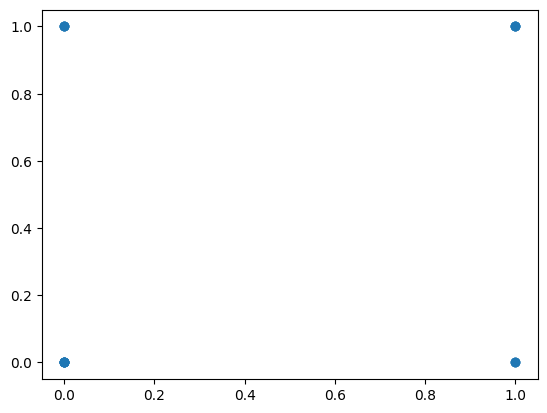

In [68]:
plt.scatter(y_test, yhat_test_reshaped_3)

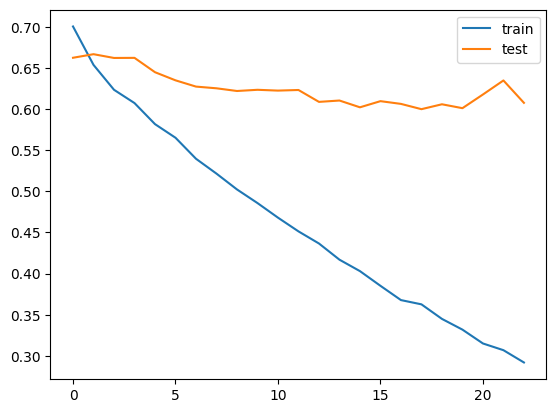

In [69]:
plt.plot(results_3.history['loss'], label='train')
plt.plot(results_3.history['val_loss'], label='test')
plt.legend()

Epoch 1/100
3/3 [==============================] - 1s 71ms/step - loss: 0.7154 - accuracy: 0.4118 - val_loss: 0.7092 - val_accuracy: 0.4444
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6998 - accuracy: 0.4559 - val_loss: 0.7080 - val_accuracy: 0.4444
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6943 - accuracy: 0.5147 - val_loss: 0.7126 - val_accuracy: 0.4444
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6883 - accuracy: 0.5147 - val_loss: 0.7126 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6834 - accuracy: 0.5294 - val_loss: 0.7083 - val_accuracy: 0.3889
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6784 - accuracy: 0.5441 - val_loss: 0.7008 - val_accuracy: 0.3889
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6708 - accuracy: 0.5735 - val_loss: 0.6899 - val_accuracy: 0.4444
Epoch 8/100
3/3 [===

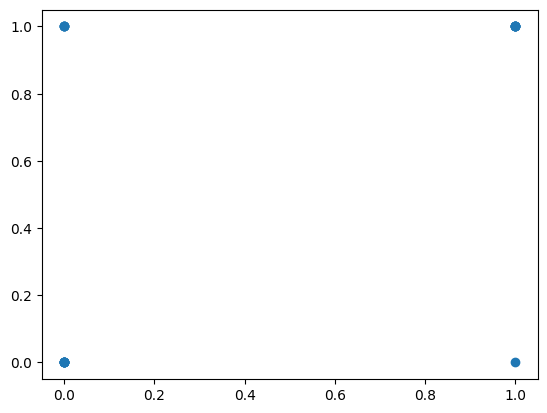

In [77]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model_4.add(Dense(32, activation='tanh'))
model_4.add(Dense(16, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

results_4 = model_4.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callBack)

yhat_test_4 = model_4.predict(x_test).round()
yhat_test_reshaped_4 = np.reshape(yhat_test_4, y_test.shape)
print(cr(y_test, yhat_test_reshaped_4))
print(cm(y_test, yhat_test_reshaped_4))

plt.scatter(y_test, yhat_test_reshaped_4)

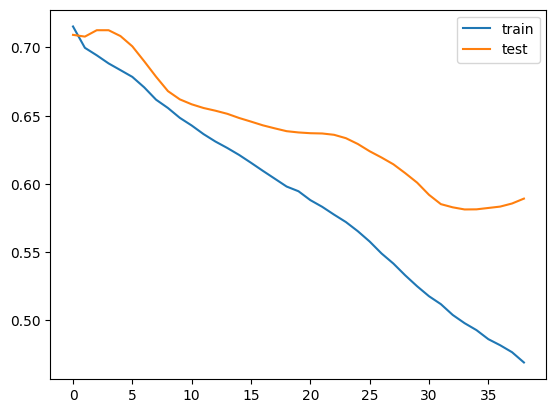

In [78]:
plt.plot(results_4.history['loss'], label='train')
plt.plot(results_4.history['val_loss'], label='test')
plt.legend()

In [79]:
print(yhat_test_reshaped_4)
print(y_test)

[1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
